In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_602_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1428_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1282_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_93_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/w_r_59_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1992_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1461_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/w_r_101_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_379_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_598_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1303_.jpg
/kaggle/input/semantic-segmen

In [2]:
# model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
# model

In [3]:
!wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/engine.py
!wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/utils.py
!wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/transforms.py
!wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/coco_eval.py
!wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/coco_utils.py
!pip install -q -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [4]:
# !wget --quiet https://github.com/sizhky/torch_snippets.git
!pip install torch_snippets
from torch_snippets import *
from torch_snippets.inspector import inspect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 781.4 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 56.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.5 MB/s eta 0:00:0000:01:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=ae795fdc5007149b2ee89e675d5d6d9b5eb2e83b72672209db5eaf77dc5b136e
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typ

In [5]:
# этот блок устраняет ошибку версии numpy, которая вылетала в процессе обучения
# в colab нужно просто понизить версию numpy путем: 
# !pip install --force-reinstall numpy==1.23 # понижение версии чтобы не было ошибки np.float
from packaging import version
import numpy as np

if version.parse(np.__version__) >= version.parse("1.24.0"):
    np.float = np.float32

In [6]:
!pip install pycocotools
!pip show pycocotools
import pycocotools

Name: pycocotools
Version: 2.0
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: /opt/conda/lib/python3.10/site-packages
Requires: cython, matplotlib, setuptools
Required-by: 


In [7]:
# from torch_snippets import *
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T, models, datasets
from xml.etree import ElementTree as et
import torchvision
import glob
import cv2
import pandas as pd
# import numpy as np
import matplotlib.patches as patches
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

from engine import train_one_epoch, evaluate
import utils
import transforms as T

# **0. Создаем, сортируем 2 списка pics и anns, параллельно удаляя 'кривые' маски и соответствующие картинки**

In [9]:
#train
p = glob.glob('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/*')
a = glob.glob('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/*')
#test
pi = glob.glob('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/*')
#---------------------------------------------------------
oo = glob.glob('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/masks/*')
from re import search
an = []
for i in oo:
    if search('.bmp', i):
#     if '.bmp' in i:
        an.append(i)
#---------------------------------------------------------

print(len(p)), print(len(a)), print(len(pi)), print(len(an))
print(p[0])
print(a[0])
print(pi[0])
print(an[0])


1525
1525
110
110
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/n_l_8_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_52_.bmp
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_602_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/masks/f_r_54_.bmp


In [10]:
way_anns = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/'
way_anns_test = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/masks/'

In [11]:
# 1. Убираем из списа аннотаций маски, где кроме значений 255 и 0 есть другие значения (чистим от мусора типа)
def f(image_lst,annotation_lst, way):
    ann = []
    for i in annotation_lst:
        pi = read(i)
        if len(np.unique(pi)) > 2: continue
        else: ann.append(i)
    anns = sorted([str(i) for i in ann])


    # 2. Создаем список картинок на основе отобранных аннотаций на предыдущем шаге
    pic = []
    for i in image_lst:
    #     print(f'/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/{i.split("/")[-1][:-4]}.jpg')
        if f'{way}{i.split("/")[-1][:-4]}.bmp' in anns:
            pic.append(i)
        pics = sorted([str(i) for i in pic])
    return pics, anns

In [12]:
pics, anns = f(p,a,way_anns)
print('----------------------------------------')
print(f'Длина списка с аннотациями: {len(anns)}')
print(f'Длина списка с картинками: {len(pics)}')
print('----------------------------------------')

# 3. Сравниваем 2 списка по названиям файлов (без расширения)
print(f'Количество похожих навзваний картинок в pics и anns: {len(set(stems(anns)).intersection(set(stems(pics))))}')

----------------------------------------
Длина списка с аннотациями: 1440
Длина списка с картинками: 1440
----------------------------------------
Количество похожих навзваний картинок в pics и anns: 1440


In [13]:
pics_test, anns_test = f(pi,an,way_anns_test)
print('----------------------------------------')
print(f'Длина списка с аннотациями: {len(anns_test)}')
print(f'Длина списка с картинками: {len(pics_test)}')
print('----------------------------------------')

# 3. Сравниваем 2 списка по названиям файлов (без расширения)
print(f'Количество похожих навзваний картинок в pics и anns: {len(set(stems(anns_test)).intersection(set(stems(pics_test))))}')

----------------------------------------
Длина списка с аннотациями: 110
Длина списка с картинками: 110
----------------------------------------
Количество похожих навзваний картинок в pics и anns: 110


In [14]:
pics[:10]

['/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_105_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_113_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_125_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_132_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_145_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_148_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_14_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_153_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_160_.jpg']

In [15]:
anns[:10]

['/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_103_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_105_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_113_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_125_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_132_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_145_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_148_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_14_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_153_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_160_.bmp']

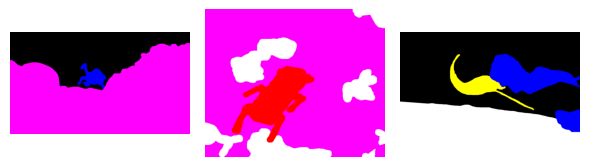

In [16]:
subplots([anns[8], anns[9], anns[10]], sz=6)

# **1. Определяем классы, преобразуем цветнцю маску в черно-белую, подставляя значения классов согласно словарю**

In [17]:
targets2label = {0 : 'вода', 1 : 'роботы', 2 : 'растения', 3 : 'рыбы', 4 : 'люди', 5 : 'риф_губки', 6 : 'корабли_руины', 7 : 'дно'}
targets2label

{0: 'вода',
 1: 'роботы',
 2: 'растения',
 3: 'рыбы',
 4: 'люди',
 5: 'риф_губки',
 6: 'корабли_руины',
 7: 'дно'}

In [18]:
def mask_to_mask(annotaition_way):
    lst = [0, 3, 9, 12, 18, 21, 27, 30]
    dct = {3:1, 9:2, 12:3, 18:4, 21:5, 27:6, 30:7}
# ---------------------------------------------------------
# 0. Преобразования входного изображения:
    an = cv2.imread(annotaition_way)
    an = cv2.cvtColor(an,cv2.COLOR_BGR2RGB).transpose(-1,0,1)
#     an[an > 0] = 255
    r,g,b = an
    
#     r[r > 0] = 255
#     g[g > 0] = 255
#     b[b > 0] = 255
    
    
    ff = (r/255*3)+(g/255*9)+(b/255*18)
    mask = np.array(ff, dtype=int)

    for _ in mask:
        for j in range(len(_)):
            if _[j] not in lst:
                _[j] = 0
            elif _[j] == 0: continue
            else:
                _[j] = dct[_[j]]
    msc =[]
    for i in np.arange(3):
        msc.append(mask)
    return np.array(msc).astype(np.uint8)#.transpose(1,2,0)
#     return np.unique(mask), mask.shape, np.array(msc).astype(np.uint8).transpose(1,2,0).shape

# ВЫХОД:
# на выходе массив array, размер (3, 540, 960), все каналы одинаковые,тип данных np.uint8,
# со значениями: {0:'вода', 1:'роботы', 2:'растения', 3:'рыбы', 4:'люди', 5:'риф_губки', 6:'корабли_руины', 7:'дно'}

# **2. Смотрим картинки anns и pics после преобразования**

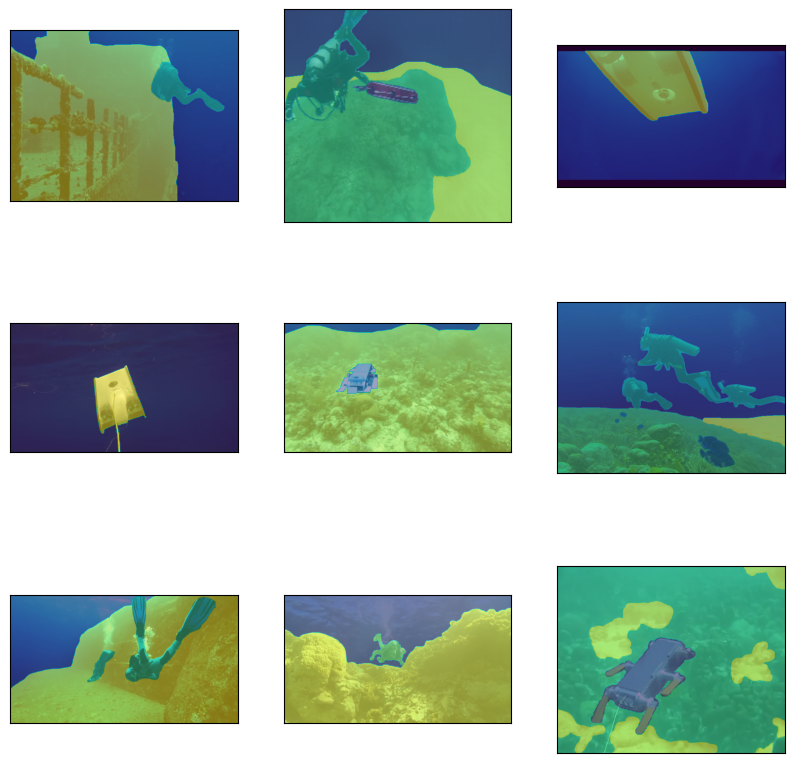

In [19]:
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=pics[i]
    msk=mask_to_mask(anns[i])
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk[0],alpha=0.5)
    plt.xticks([]), plt.yticks([])
plt.show()

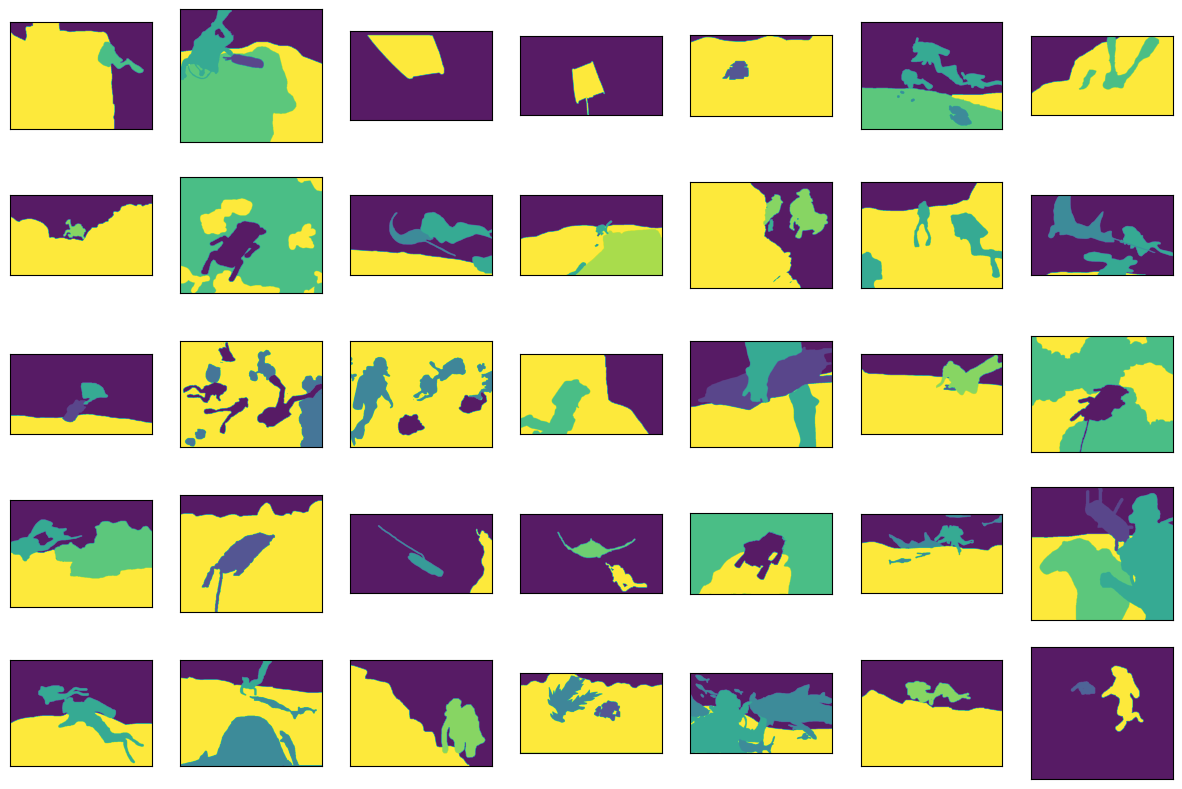

In [20]:
rows,cols=5,7
fig=plt.figure(figsize=(15,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    msk=mask_to_mask(anns[i])
    plt.imshow(msk[0],alpha=0.9)
    plt.xticks([]), plt.yticks([])
plt.show()

(480, 640, 3) (480, 640, 3) (3, 480, 640)


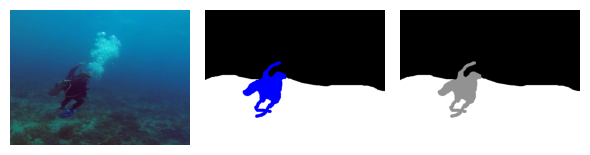

In [21]:
print(read(pics[69]).shape, read(anns[69]).shape, mask_to_mask(anns[69]).shape)
subplots([pics[69], anns[69], mask_to_mask(anns[69])[2]], sz=6)

# **3. Аугментация**

In [22]:
def get_transform(train):
    image_transforms = []
    image_transforms.append(T.PILToTensor())
    image_transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        image_transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(image_transforms)

# **4. Определяем функцию для подачи данных в DataLoader**

In [23]:
print(pics[3])
print(anns[3])

/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_125_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_125_.bmp


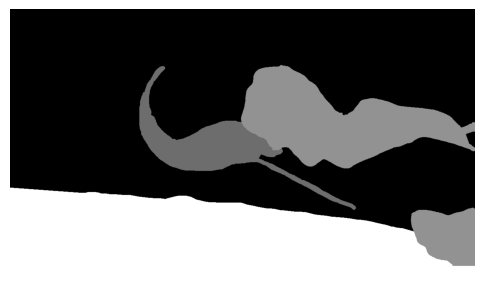

In [24]:
show(mask_to_mask(anns[10])[0], sz=6)

In [25]:
classes_list = [1,2,3,4,5,6,7]
def get_mask(path):
    an = mask_to_mask(path)
    r,g,b = an
    cls = list(np.unique(r))[1:]
#     print(cls)
    masks = []
    labels = []
    for _cls in cls:
        nzs = np.nonzero(r==_cls)
        instances = np.unique(g[nzs])
        for ix,_id in enumerate(instances):
            masks.append(g==_id)
            labels.append(classes_list.index(_cls)+1)
    print(labels)
    return np.array(masks), np.array(labels)

In [26]:
get_mask(anns[111])

[1, 4, 5]


(array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True, 

(tensor([[[0.2980, 0.3137, 0.3137,  ..., 0.4745, 0.4667, 0.4627],
         [0.2863, 0.2980, 0.3137,  ..., 0.4667, 0.4588, 0.4549],
         [0.2667, 0.2784, 0.2980,  ..., 0.4549, 0.4471, 0.4471],
         ...,
         [0.0431, 0.0118, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0314, 0.0118, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0588, 0.0235, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.6275, 0.6431, 0.6510,  ..., 0.8118, 0.8039, 0.8000],
         [0.6157, 0.6353, 0.6510,  ..., 0.8039, 0.7961, 0.7922],
         [0.6039, 0.6275, 0.6471,  ..., 0.8000, 0.7922, 0.7922],
         ...,
         [0.5608, 0.5333, 0.5137,  ..., 0.0471, 0.0471, 0.0471],
         [0.5333, 0.5137, 0.5176,  ..., 0.0471, 0.0471, 0.0471],
         [0.5569, 0.5216, 0.4941,  ..., 0.0471, 0.0471, 0.0471]],

        [[0.9647, 0.9804, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
         [0.9529, 0.9686, 0.9843,  ..., 1.0000, 0.9961, 0.9922],
         [0.9373, 0.9569, 0.9765,  ..., 0.9961, 0.9882, 0

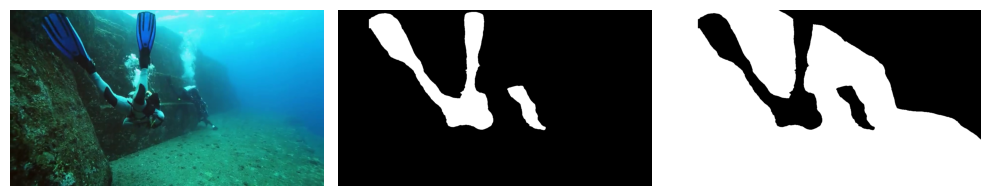

In [27]:
class MasksDataset(Dataset):
    def __init__(self, pics, anns, transforms):
        self.pics = pics
        self.anns = anns
        self.transforms = transforms
    def get_mask(self,path):
        an = mask_to_mask(path)#.transpose(2,0,1)
        r,g,b = an
        cls = list(np.unique(r))[1:]
        masks = []
        labels = []
        for _cls in cls:
          nzs = np.nonzero(r==_cls)
          instances = np.unique(g[nzs])
          for ix,_id in enumerate(instances):
              masks.append(g==_id)
              labels.append(classes_list.index(_cls)+1)
        return np.array(masks), np.array(labels)
    def __getitem__(self, ix):
#         _id = self.items[ix]
#         img_path = f'images/training/{_id}.jpg'
#         mask_path = f'annotations_instance/training/{_id}.png'
        img_path = self.pics[ix]
        mask_path = self.anns[ix]
        masks, labels = self.get_mask(mask_path)
#         print(masks)
        obj_ids = np.arange(1, len(masks)+1)
        img = Image.open(img_path).convert("RGB")
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            obj_pixels = np.where(masks[i])
            xmin = np.min(obj_pixels[1])
            xmax = np.max(obj_pixels[1])
            ymin = np.min(obj_pixels[0])
            ymax = np.max(obj_pixels[0])
            if (((xmax-xmin)<=10) | (ymax-ymin)<=10):
                xmax = xmin+10
                ymax = ymin+10
            boxes.append([xmin, ymin, xmax, ymax])
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)
#         print(boxes)
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        image_id = torch.tensor([ix])
#         print(image_id)
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
        if self.transforms is not None:
            img, target = self.transforms(img, target)
        if (img.dtype == torch.float32) or (img.dtype == torch.uint8):
#             print(img.shape)
#             show(img)
            img = img#/255.
        return img, target
    def __len__(self):
        return len(self.anns)
    def choose(self):
        return self[randint(len(self))]
x = MasksDataset(pics, anns, get_transform(train=True))
print(x[0])
im,targ = x[7]
# print(im)
inspect(im,targ)
# show(im)
subplots([im, *targ['masks']], sz=10)

In [28]:
def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=True)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,num_classes)
    return model

In [29]:
model = get_model_instance_segmentation(8).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 159MB/s]  


In [30]:
dataset = MasksDataset(pics, anns, get_transform(train=True))
dataset_test = MasksDataset(pics_test, anns_test, get_transform(train=False))

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=0,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

In [31]:
num_classes = len(classes_list)+1
model = get_model_instance_segmentation(num_classes).to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=3,
                                                gamma=0.1)

In [32]:
model.eval()
pred = model(dataset[0][0][None].to(device))
inspect(pred[0])

══════════════════════════════════════════════════════════════════
dict of 4 items
tensor([[ 26.5888, 174.9622, 142.8576, 458.1627],
        [213.9892, 155.7782, 345.5357, 396.7735],
        [ 17.9605, 137.6286, 316.2692, 427.6980],
        [ 39.8690,  97.2829, 152.3937, 360.6539],
        [ 12.5161,  35.8662, 202.8059, 447.3436],
        [151.0211, 161.0592, 378.1486, 298.2630],
        [149.1580, 344.9597, 193.3191, 390.5633],
        [128.7549, 300.1136, 189.3121, 378.9048],
        [112.9296, 320.5429, 214.2134, 377.0244],
        [433.8453, 254.8170, 476.4796, 339.5230],
        [269.0017, 181.6416, 330.0547, 313.3597],
        [ 84.4280, 131.2507, 138.1819, 243.8152],
        [263.7511, 228.9986, 349.2195, 342.3940],
        [109.0096, 157.0711, 318.2349, 316.2287],
        [209.1117, 158.7182, 276.0316, 276.2541],
        [231.2299, 213.5384, 314.1528, 312.3948],
        [249.2107, 256.9136, 337.1523, 278.5825],
        [311.7032, 275.6216, 379.3366, 330.7480],
        [321.8314

In [33]:
num_epochs = 5

trn_history = []
for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    res = train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    trn_history.append(res)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    res = evaluate(model, data_loader_test, device=device)

Epoch: [0]  [  0/720]  eta: 0:22:00  lr: 0.000012  loss: 3.5675 (3.5675)  loss_classifier: 1.6904 (1.6904)  loss_box_reg: 0.2785 (0.2785)  loss_mask: 1.4870 (1.4870)  loss_objectness: 0.0982 (0.0982)  loss_rpn_box_reg: 0.0133 (0.0133)  time: 1.8342  data: 0.7606  max mem: 2974
Epoch: [0]  [ 10/720]  eta: 0:16:36  lr: 0.000081  loss: 3.5443 (3.3778)  loss_classifier: 1.6396 (1.6101)  loss_box_reg: 0.1622 (0.2047)  loss_mask: 1.4870 (1.4512)  loss_objectness: 0.0388 (0.0598)  loss_rpn_box_reg: 0.0412 (0.0521)  time: 1.4035  data: 0.8503  max mem: 3583
Epoch: [0]  [ 20/720]  eta: 0:16:31  lr: 0.000151  loss: 2.9024 (2.8316)  loss_classifier: 1.1356 (1.2022)  loss_box_reg: 0.1579 (0.1951)  loss_mask: 1.3228 (1.3269)  loss_objectness: 0.0328 (0.0436)  loss_rpn_box_reg: 0.0634 (0.0639)  time: 1.3949  data: 0.8825  max mem: 3594
Epoch: [0]  [ 30/720]  eta: 0:16:47  lr: 0.000220  loss: 1.7892 (2.3891)  loss_classifier: 0.3784 (0.9068)  loss_box_reg: 0.1596 (0.1963)  loss_mask: 0.9314 (1.1792) 

In [34]:
# %load /kaggle/working/coco_eval.py
# %%writefile /kaggle/working/coco_eval.py

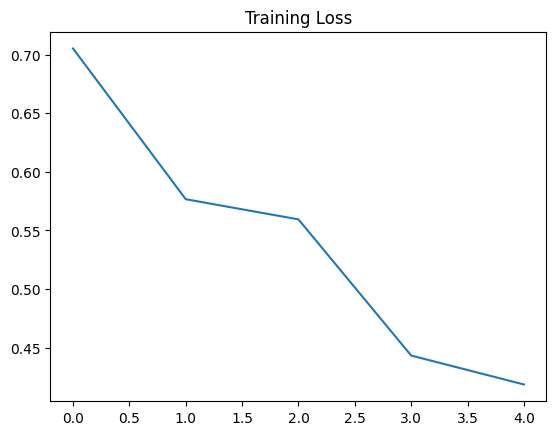

In [35]:
import matplotlib.pyplot as plt
plt.title('Training Loss')
losses = [np.mean(list(trn_history[i].meters['loss'].deque)) for i in range(len(trn_history))]
plt.plot(losses)

In [ ]:
losses

# **15. Сохраняем/загружаем модель**

In [36]:
save_path = 'Mask_R-CNN(_эпох).pth'
torch.save(model.state_dict(), save_path)
!du -hsc {save_path} # size of the model on disk

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `du -hsc Mask_R-CNN(_эпох).pth # size of the model on disk'


In [ ]:
load_path = '/content/Mask_R-CNN(_эпох).pth'
# model.load_state_dict(torch.load(load_path)) #  # строка при загрузке на GРU
model.load_state_dict(torch.load(load_path, map_location=torch.device('cpu'))) # строка при загрузке на СРU

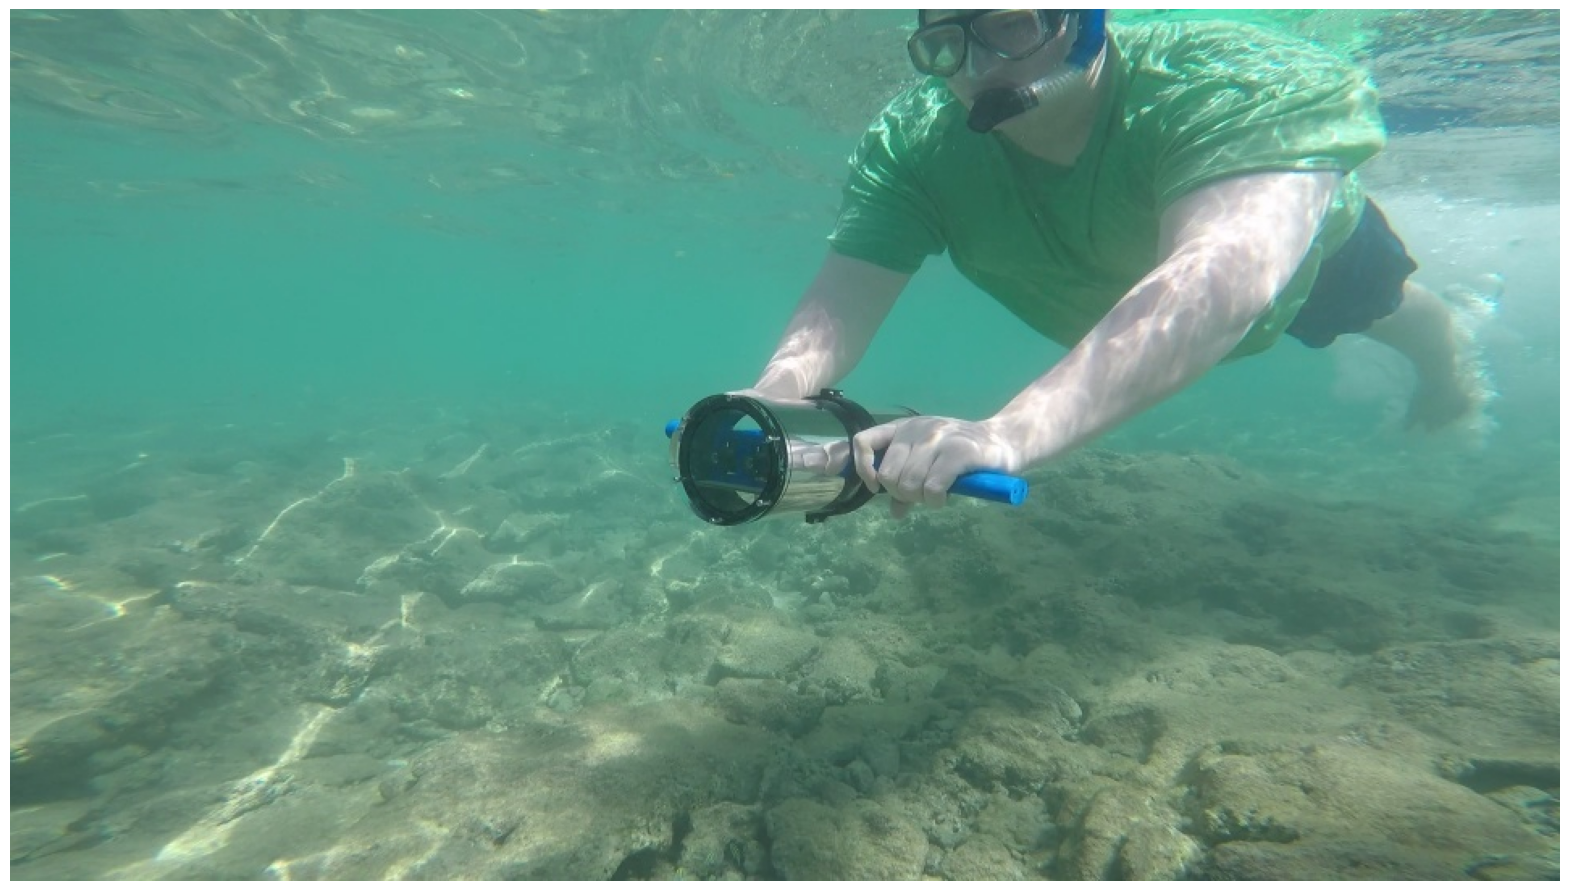

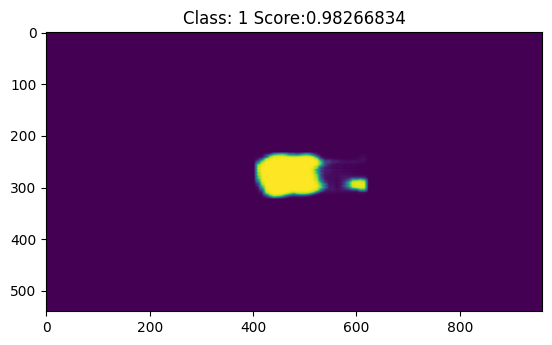

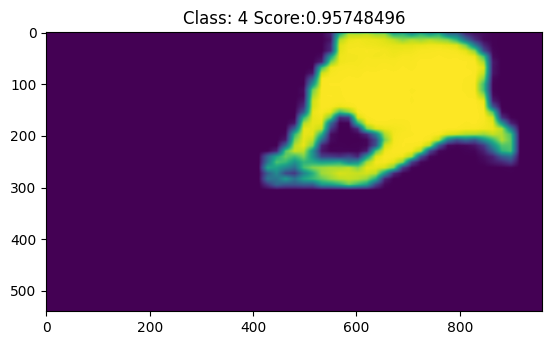

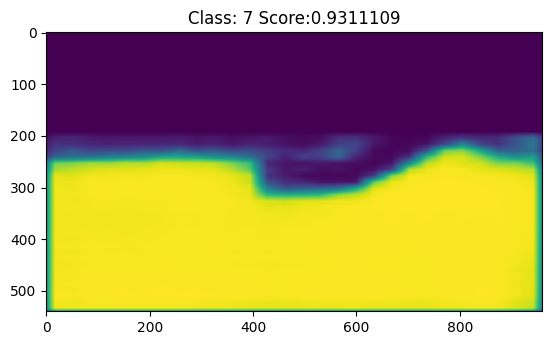

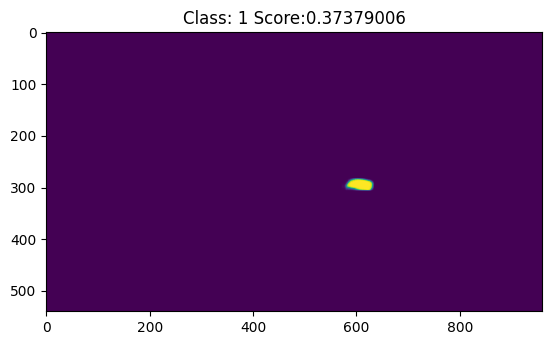

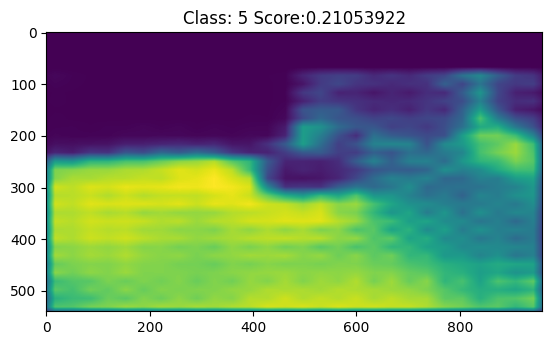

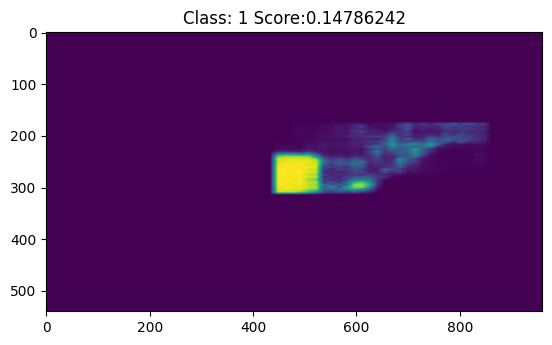

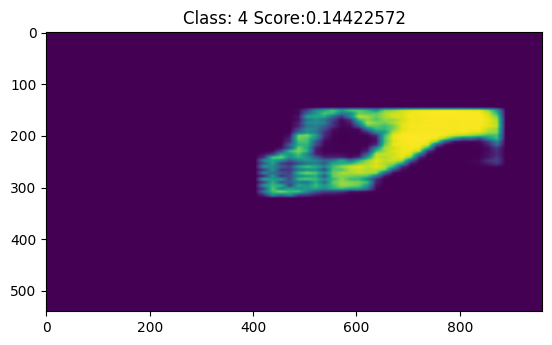

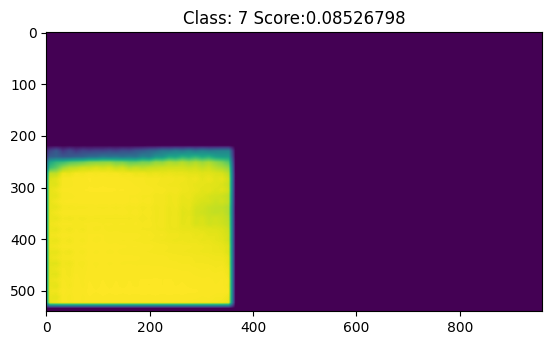

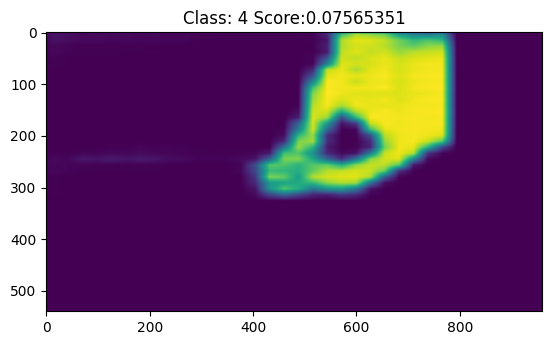

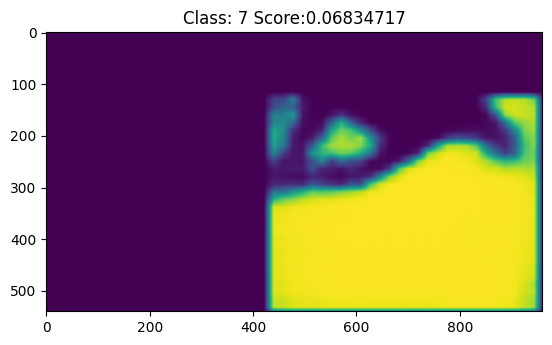

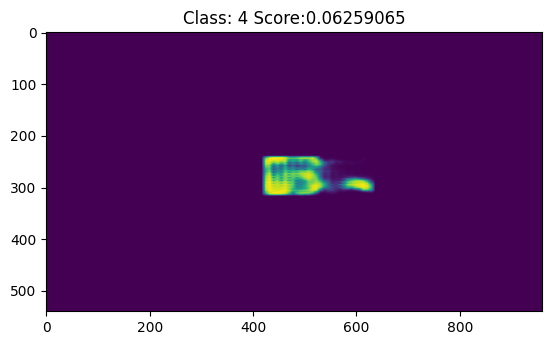

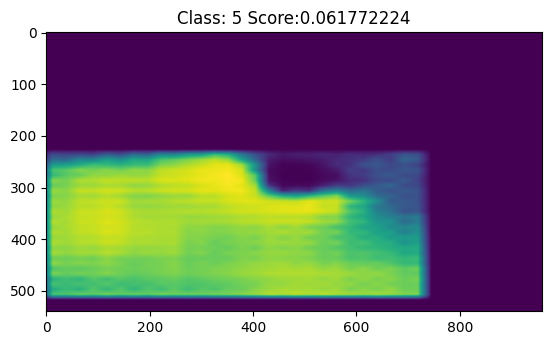

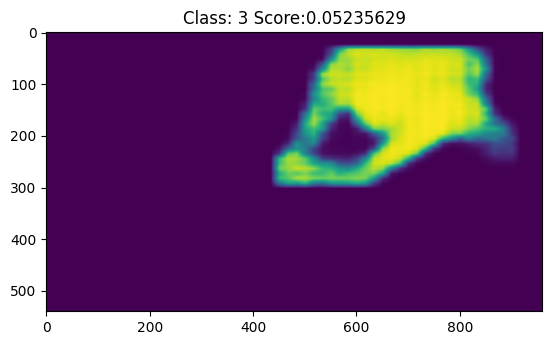

In [37]:
model.eval()
im = dataset_test[12][0]
show(im)
with torch.no_grad():
    prediction = model([im.to(device)])
    for i in range(len(prediction[0]['masks'])):
        plt.imshow(Image.fromarray(prediction[0]['masks'][i, 0].mul(255).byte().cpu().numpy()))
        plt.title('Class: '+str(prediction[0]['labels'][i].cpu().numpy())+' Score:'+str(prediction[0]['scores'][i].cpu().numpy()))
        plt.show()

# **Делаем предсказания на любой картинке:**

# **1. Загружаем картинку:**

In [140]:
# for i in pics_test[50:99]:
#     print(i)
#     show(i,sz=5)

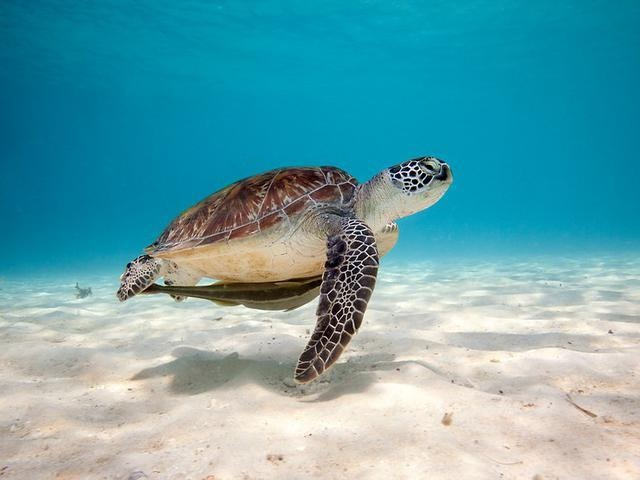

In [80]:
img = Image.open('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1920_.jpg').convert("RGB")
from torchvision import transforms
pil_to_tensor = transforms.ToTensor()(img).unsqueeze_(0)
Image.fromarray(pil_to_tensor[0].mul(255).permute(1, 2, 0).byte().numpy())

# **2. Делаем предсказания и выводим сегментацию:**

In [49]:
targets2label = {0 : 'вода', 1 : 'роботы', 2 : 'растения', 3 : 'рыбы', 4 : 'люди', 5 : 'риф_губки', 6 : 'корабли_руины', 7 : 'дно'}

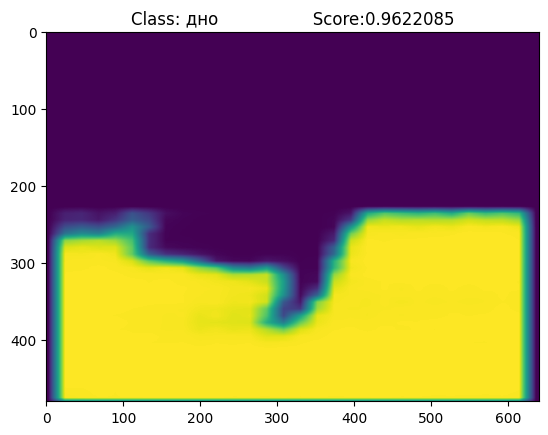

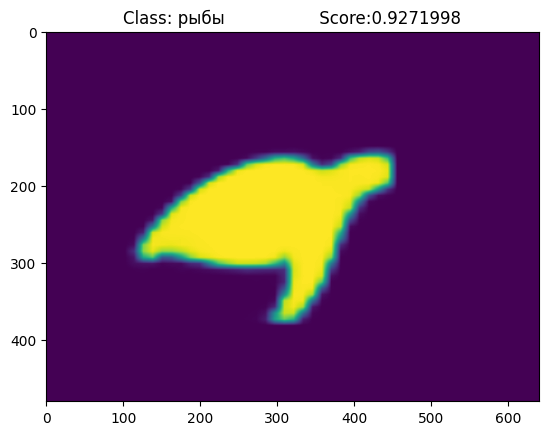

In [128]:
cl = []
bbxes = []
model.eval()
with torch.no_grad():
  prediction = model([pil_to_tensor[0].to(device)])
  for i in range(len(prediction[0]['masks'])):
    if prediction[0]['scores'][i] > 0.6:
        plt.imshow(Image.fromarray(prediction[0]['masks']\
                  [i, 0].mul(255).byte().cpu().numpy()))
        plt.title('Class: '+targets2label[int(prediction[0]['labels'][i].cpu().numpy())]+'\
                  Score:'+str(prediction[0]['scores'][i].cpu().numpy()))
        plt.show()
        bbxes.append(list(prediction[0]['boxes'][i].cpu().numpy()))
        cl.append(targets2label[int(prediction[0]['labels'][i].cpu())])

# **3. Выводим bboxes с помощью torchsnippets:**

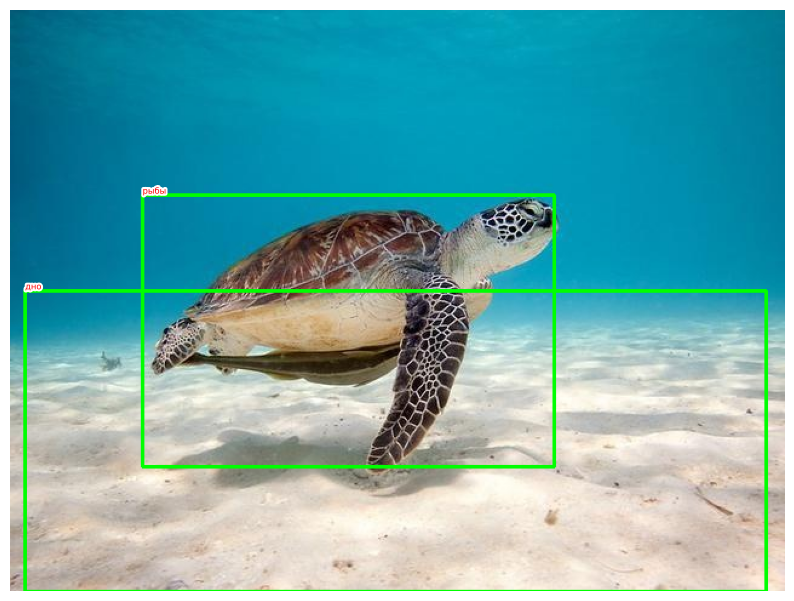

In [131]:
im = '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1920_.jpg'
bbs = torch.Tensor(bbxes)#prediction[0]['boxes'][:2]
clss = cl#prediction[0]['labels'][:2]

show(im, bbs=bbs, texts=clss, sz=10)

# **4. Выводим bboxes без использования torchsnippets:**

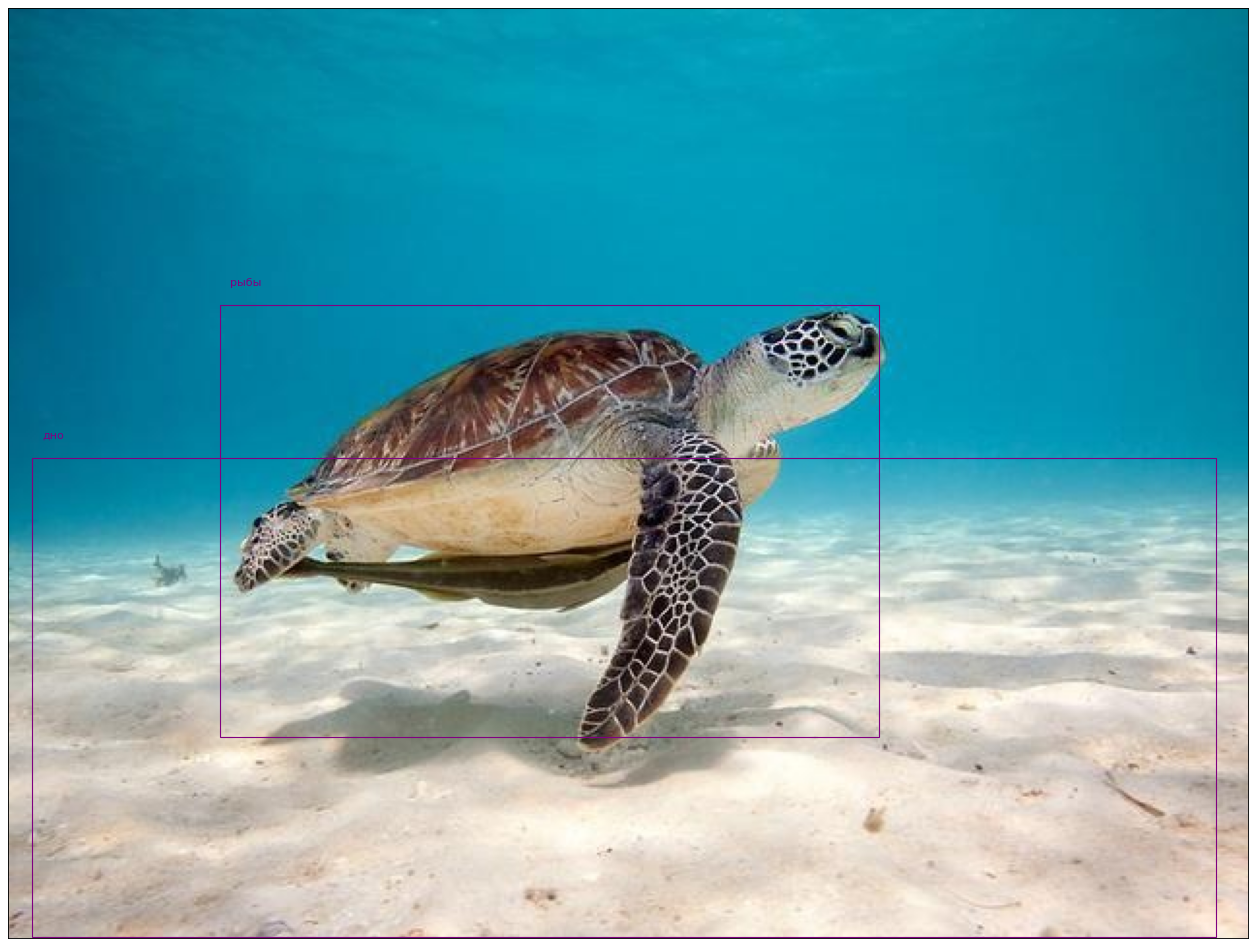

In [137]:
import matplotlib.patches as patches
#-------------------------------
# переводим картинку в цифру
im = Image.open('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1920_.jpg')
im = im.convert('RGB')
im = np.asarray(im)#.transpose(-1,0,1)/255
#-------------------------------
plt.figure(figsize=(20,20), dpi=80)
plt.imshow(im)
#-------------------------------
#объединяем коробки и классы
lst = list(zip(bbxes,cl))
for _ in lst:
    bbox = _[0]
    label = _[1]#.item()
    rect = patches.Rectangle(xy=(int(bbox[0]), int(bbox[1])), width=int(bbox[2]-bbox[0]),
                             height=int(bbox[3]-bbox[1]), fill=False, gid = label, color = 'purple')#, facecolor = 'pink')#, edgecolor=color, linewidth=2)
    plt.gca().add_patch(rect)
    plt.text(int(bbox[0]+5), int(bbox[1]-10), label, color = 'purple')
plt.xticks([]), plt.yticks([])
plt.show()